# Goal
The goal is to predict **energy** based on acousticness, loudness, instrumentalness and other factors. 

Our team has chosen the Hugging Face Spotify Tracks dataset.

The key features we have decided to study are **loudness, acousticness, instrumentalness**, energy (for training) because these would be most useful for energy value prediction.



In [3]:
import pandas as pd

df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

In [4]:
from datascience import *
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

### Data Exploration

In [5]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [6]:
df.sample(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
74966,74966,6EEDuy7cieppsAqgEvCkkL,Dominguinhos,Ao Vivo,Eu Só Quero um Xodó (Ao Vivo),41,178200,False,0.460,0.613,...,-11.462,1,0.0553,0.715000,0.000036,0.5520,0.751,177.381,4,mpb
49195,49195,32bwybOSnnYG2YTZot6W6x,Zanger Kafke,Onze Dag (Hosclt Remix),Onze Dag - Hosclt Remix,29,124800,False,0.595,0.918,...,-5.699,1,0.1700,0.034800,0.000001,0.1760,0.800,149.934,4,hardstyle
19853,19853,4686eQ81DEswHa90bcdlC9,Bailey Zimmerman,Rock and A Hard Place,Rock and A Hard Place,84,207540,False,0.582,0.568,...,-7.300,1,0.0275,0.577000,0.000000,0.1050,0.394,121.991,3,country
95059,95059,1cljqIpqVclOzZBG4jWiTm,Tony Vega,Ritmo Bonito,Ella Es,0,302986,False,0.483,0.843,...,-9.476,0,0.0338,0.279000,0.000000,0.0671,0.961,99.359,4,salsa
60885,60885,7JRiMZd8uYb5tTL9hMXLk6,Rygin King,Scheme House,Scheme House,18,156084,True,0.720,0.678,...,-5.487,1,0.1850,0.695000,0.000000,0.1110,0.489,125.250,5,j-dance
71373,71373,0S3gpZzlT9Hb7CCSV2owX7,Ozzy Osbourne,No More Tears (Expanded Edition),"Mama, I'm Coming Home",69,251866,False,0.282,0.656,...,-6.557,1,0.0302,0.010500,0.000000,0.0892,0.242,139.352,4,metal
33038,33038,0Re4mDIlMH1IK5Tr9QArVl,My Chemical Romance,Tek It - New Noise,The Foundations of Decay,0,360760,False,0.363,0.670,...,-6.652,0,0.0552,0.000582,0.548000,0.3170,0.198,150.150,4,emo
8898,8898,4Z0MZsT09o9t6RdYa0pTNx,Memphis La Blusera,"Cosa de Hombres, Vol. 1",Se Necesita,34,422613,False,0.578,0.672,...,-6.975,1,0.0421,0.158000,0.000000,0.3620,0.580,128.997,4,blues
52029,52029,05qxVI0FGM6OiestYxA8Wn,George Jones,Mr. Country and Western,White Lightnin',26,166368,False,0.603,0.717,...,-12.338,1,0.0622,0.685000,0.000016,0.1050,0.943,149.092,4,honky-tonk
10543,10543,5hvH9Zo5yjB6zvhd4qOTpM,Freestylers,Adventures In Freestyle,Could I Be Dreaming?,13,264640,False,0.580,0.905,...,-4.330,1,0.0311,0.003140,0.000000,0.5350,0.504,102.013,4,breakbeat


The one missing row might be because the name and artists are in Korean since it is a k-pop genre song.

In [7]:
missing_prop = df.isna().sum() / len(df.index)
missing_prop.sort_values()
missing_rows = df[df.isna().any(axis=1)]

print("Number of missing data rows:", len(missing_rows))
print("Missing data rows:")
print(missing_rows)

Number of missing data rows: 1
Missing data rows:
       Unnamed: 0                track_id artists album_name track_name  \
65900       65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

       popularity  duration_ms  explicit  danceability  energy  ...  loudness  \
65900           0            0     False         0.501   0.583  ...     -9.46   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
65900     0       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature  track_genre  
65900  138.391               4        k-pop  

[1 rows x 21 columns]


In [8]:
# list of number of tracks (rows) in each unique track_genre
for genre in df['track_genre'].unique():
  print(f"{genre}: {len(df[df['track_genre'] == genre])}")

acoustic: 1000
afrobeat: 1000
alt-rock: 1000
alternative: 1000
ambient: 1000
anime: 1000
black-metal: 1000
bluegrass: 1000
blues: 1000
brazil: 1000
breakbeat: 1000
british: 1000
cantopop: 1000
chicago-house: 1000
children: 1000
chill: 1000
classical: 1000
club: 1000
comedy: 1000
country: 1000
dance: 1000
dancehall: 1000
death-metal: 1000
deep-house: 1000
detroit-techno: 1000
disco: 1000
disney: 1000
drum-and-bass: 1000
dub: 1000
dubstep: 1000
edm: 1000
electro: 1000
electronic: 1000
emo: 1000
folk: 1000
forro: 1000
french: 1000
funk: 1000
garage: 1000
german: 1000
gospel: 1000
goth: 1000
grindcore: 1000
groove: 1000
grunge: 1000
guitar: 1000
happy: 1000
hard-rock: 1000
hardcore: 1000
hardstyle: 1000
heavy-metal: 1000
hip-hop: 1000
honky-tonk: 1000
house: 1000
idm: 1000
indian: 1000
indie-pop: 1000
indie: 1000
industrial: 1000
iranian: 1000
j-dance: 1000
j-idol: 1000
j-pop: 1000
j-rock: 1000
jazz: 1000
k-pop: 1000
kids: 1000
latin: 1000
latino: 1000
malay: 1000
mandopop: 1000
metal: 100

### Data Cleaning
There is only 1 row missing some values, so we are removing this row.

In [9]:
df = df.dropna()
missing_prop = df.isna().sum() / len(df.index)
missing_prop.sort_values()
missing_rows = df[df.isna().any(axis=1)]

print("Number of missing data rows:", len(missing_rows))
print("Missing data rows:")
print(missing_rows)

Number of missing data rows: 0
Missing data rows:
Empty DataFrame
Columns: [Unnamed: 0, track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []

[0 rows x 21 columns]


### Exploratory Data Analysis

In [10]:
avg_energy_per_genre = df.groupby('track_genre')['energy'].mean().reset_index()
avg_energy_per_genre.columns = ['Genre', 'Average Energy']
avg_energy_per_genre_sorted = avg_energy_per_genre.sort_values(by='Average Energy', ascending=True)
pd.set_option('display.max_rows', None)
print(avg_energy_per_genre_sorted)

                 Genre  Average Energy
16           classical        0.189827
75             new-age        0.214501
4              ambient        0.237162
93             romance        0.294304
26              disney        0.302519
76               opera        0.317054
79               piano        0.320103
45              guitar        0.324999
101              sleep        0.342072
64                jazz        0.352954
52          honky-tonk        0.366957
108              tango        0.372828
98          show-tunes        0.398742
105              study        0.410658
15               chill        0.426723
99   singer-songwriter        0.434188
102         songwriter        0.434188
0             acoustic        0.435368
12            cantopop        0.461696
94                 sad        0.462470
14            children        0.494645
70            mandopop        0.498434
11             british        0.507127
91         rock-n-roll        0.526615
7            bluegrass   

### Correlation Matrix

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

In [12]:
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print(non_numeric_cols)
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
mode_correlation = correlation_matrix['mode'].sort_values(ascending=False)
print(mode_correlation)

fig = px.imshow(correlation_matrix, text_auto=True)
fig.update_layout(title='Correlation Matrix')
fig.show()

['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'track_genre']
mode                1.000000
acousticness        0.095568
valence             0.021964
liveness            0.014004
Unnamed: 0          0.005110
tempo               0.000572
popularity         -0.013948
time_signature     -0.024090
duration_ms        -0.035581
loudness           -0.041768
speechiness        -0.046535
instrumentalness   -0.049961
danceability       -0.069224
energy             -0.078365
key                -0.135911
Name: mode, dtype: float64


## KNN

Applying KNN for the energy feature:

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

To split the energy feature into a binary feature, we are specifying the threshold to be the 75th percentile. So the top 25% of tracks will be "high", and everything else is "low".

In [16]:
df_copy = df.copy()
threshold = df_copy['energy'].median()

df_copy["energy_level"] = df_copy['energy'].apply(lambda x: "high" if x>=threshold else "low")

#encode as 0 or 1 (1 = high, 0 = low)
le = LabelEncoder()
df_copy['energy_level'] = le.fit_transform(df_copy['energy_level'])

# dropping energy_level, and the non numerical features
X = df_copy[['loudness', 'acousticness']] # chosen using our correlation matrix
y = df_copy['energy_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn15 = KNeighborsClassifier(n_neighbors=15)
knn25 = KNeighborsClassifier(n_neighbors=25)

In [18]:
knn1.fit(X_train, y_train)
knn15.fit(X_train, y_train)
knn25.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [19]:
y_pred1 = knn1.predict(X_test)
y_pred15 = knn15.predict(X_test)
y_pred25 = knn25.predict(X_test)

In [20]:
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy15 = accuracy_score(y_test, y_pred15)
accuracy25 = accuracy_score(y_test, y_pred25)

print(f"Accuracy knn1: {accuracy1}")
print(f"Accuracy knn15: {accuracy15}")
print(f"Accuracy knn25: {accuracy25}")

Accuracy knn1: 0.8475730994152046
Accuracy knn15: 0.8319005847953216
Accuracy knn25: 0.8300292397660819


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
models = {
    "knn1": knn1,
    "knn15": knn15,
    "knn25": knn25
}

# Helper function for threshold-based prediction
def t_repredict(model, t, X):
    probs = model.predict_proba(X)[:, 1]  # Get probabilities for the positive class
    y_pred = (probs > t).astype(int)  # Apply threshold
    return y_pred

# Iterate over models and calculate metrics
for name, model in models.items():
    # Default threshold (0.5)
    y_pred_train_default = t_repredict(model, 0.5, X_train)
    
    # Custom threshold (0.65)
    y_pred_train_custom = t_repredict(model, threshold, X_train)
    
    # Confusion Matrix
    conf_matrix_train = confusion_matrix(y_train, y_pred_train_custom)
    TN, FP, FN, TP = conf_matrix_train.ravel()
    
    # Metrics
    accuracy = accuracy_score(y_train, y_pred_train_custom)
    error = 1 - accuracy # Prediction error
    true_positive_rate = TP / (TP + FN) # Sensitivity / Recall
    true_negative_rate = TN / (TN + FP) # Specificity
    f1 = f1_score(y_train, y_pred_train_custom)
    
    # Display results
    print(f"--- Metrics for {name} ---")
    print("Confusion Matrix:\n", conf_matrix_train)
    print("Prediction Accuracy:", accuracy)
    print("Prediction Error:", error) 
    print("True Positive Rate (Recall/Sensitivity):", true_positive_rate)
    print("True Negative Rate (Specificity):", true_negative_rate)
    print("F1 Score:", f1)
    print()

--- Metrics for knn1 ---
Confusion Matrix:
 [[39941    17]
 [    9 39832]]
Prediction Accuracy: 0.9996741813807191
Prediction Error: 0.0003258186192809376
True Positive Rate (Recall/Sensitivity): 0.999774102056
True Negative Rate (Specificity): 0.999574553281
F1 Score: 0.999673735726

--- Metrics for knn15 ---
Confusion Matrix:
 [[37251  2707]
 [11186 28655]]
Prediction Accuracy: 0.8259000739357636
Prediction Error: 0.1740999260642364
True Positive Rate (Recall/Sensitivity): 0.719233954971
True Negative Rate (Specificity): 0.93225386656
F1 Score: 0.804881816777

--- Metrics for knn25 ---
Confusion Matrix:
 [[37053  2905]
 [11956 27885]]
Prediction Accuracy: 0.8137695961102269
Prediction Error: 0.18623040388977308
True Positive Rate (Recall/Sensitivity): 0.699907130845
True Negative Rate (Specificity): 0.927298663597
F1 Score: 0.789596636038



<Axes: title={'center': 'ROC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

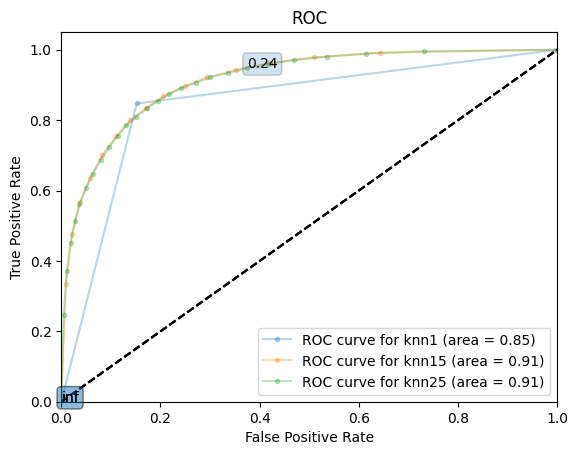

In [31]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline

# a function to make 'pretty' ROC curves for this model
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in range(0, fpr.shape[0],labe):
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

make_roc("knn1", knn1, y_test, X_test, ax=None, labe=20, proba=True, skip=1)
make_roc("knn15", knn15, y_test, X_test, ax=None, labe=20, proba=True, skip=1)
make_roc("knn25", knn25, y_test, X_test, ax=None, labe=20, proba=True, skip=1)


In [33]:
from sklearn.model_selection import cross_val_score

# --------------------------
# K-Fold Cross-Validation
# --------------------------

# We'll use the previously selected features for this exercise (or all features if you haven't done feature selection yet)
X_cv =  X
y_cv =  y

# Perform 5-Fold Cross-Validation
cv_scores_knn1 = cross_val_score(knn1, X_cv, y_cv, cv=5)
cv_scores_knn15 = cross_val_score(knn15, X_cv, y_cv, cv=5)
cv_scores_knn25 = cross_val_score(knn25, X_cv, y_cv, cv=5)

# Output the cross-validation scores for each fold
# Modify the printed scores to the acutal cv_scores
print(f"Cross-Validation Scores for each fold for knn1: {cv_scores_knn1}")
print(f"Mean Cross-Validation Accuracy for knn1: {np.mean(cv_scores_knn1) * 100:.2f}%")
print()

print(f"Cross-Validation Scores for each fold for knn15: {cv_scores_knn15}")
print(f"Mean Cross-Validation Accuracy for knn15: {np.mean(cv_scores_knn15) * 100:.2f}%")
print()

print(f"Cross-Validation Scores for each fold for knn25: {cv_scores_knn25}")
print(f"Mean Cross-Validation Accuracyfor knn25: {np.mean(cv_scores_knn25) * 100:.2f}%")
print()

Cross-Validation Scores for each fold for knn1: [ 0.82263158  0.81201754  0.8420614   0.85833333  0.79599982]
Mean Cross-Validation Accuracy for knn1: 82.62%

Cross-Validation Scores for each fold for knn15: [ 0.8247807   0.79622807  0.84078947  0.845       0.79288565]
Mean Cross-Validation Accuracy for knn15: 81.99%

Cross-Validation Scores for each fold for knn25: [ 0.82416667  0.79333333  0.84057018  0.84315789  0.79082416]
Mean Cross-Validation Accuracyfor knn25: 81.84%



## Clustering Code

We are interested in examining similarities and patterns in musical features amongst different artists and track genres.

We will begin by selecting our desired features, normalizing and scaling them. This is important because we want to ensure that out model will not be heavily impacted by outliers and allows no feature to outweigh the other in our clustering algorithm.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [35]:
# remove first two irrelevant columns
clusterdf = df.iloc[:, 2:]
clusterdf.head(3)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic


In [ ]:
# Remove columns
# clusterdf = clusterdf[['acousticness', 'instrumentalness']]
clusterdf = clusterdf[['energy', 'acousticness']] # SWITCHED IT TO THIS FROM THE ABOVE
# Normalize data
clusterdf.iloc[:, 2:] = clusterdf.iloc[:, 2:].apply(lambda x: (x -min(x))/(max(x)-min(x)))

# Scale data
ss = StandardScaler()
clusterdf_ss = ss.fit_transform(clusterdf)

### K-Means

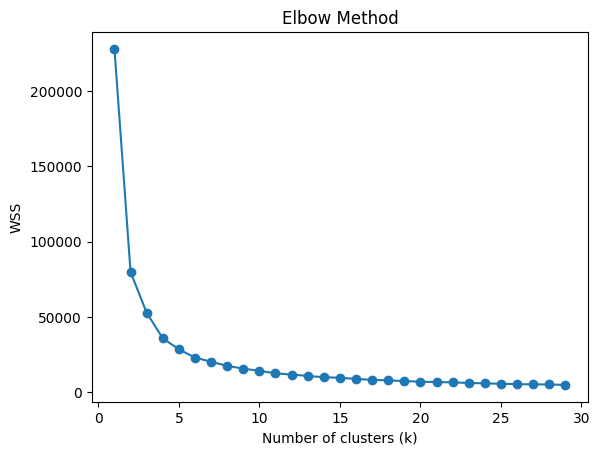

In [37]:
# Determine best k-value
wss = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(clusterdf_ss)
    wss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 30), wss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WSS")
plt.title("Elbow Method")
plt.show()

In order to determine the best k value, we will evaluate the WSS at various k's and select the k with the lowest WSS and smallest k (Elbow Method). However, based on the plot, we can see that the WSS seems to decrease over all values of k (0,30) so we will just use k=6 as it is where the eblow point is on the eblow plot. 

In [38]:
# Apply k-means with k=6
kmeans = KMeans(n_clusters=6)
y_kmeans = kmeans.fit_predict(clusterdf_ss)
centroids = kmeans.cluster_centers_

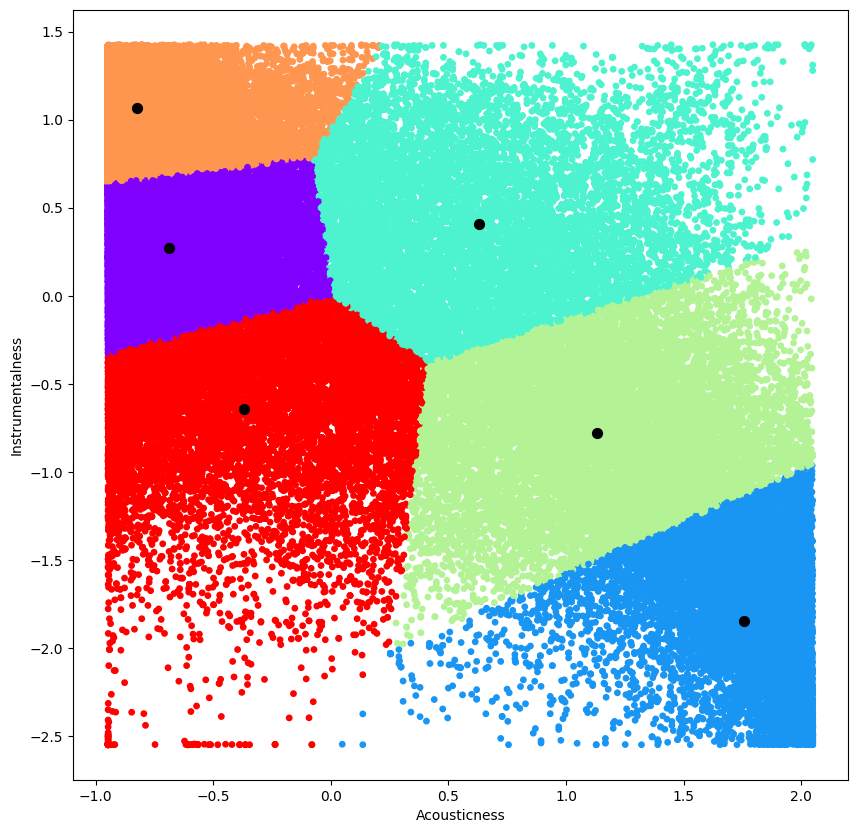

In [39]:
# Visualizing the k-means clusters using popularity and danceabiity
plt.figure(figsize=(10,10))
scatter = plt.scatter(clusterdf_ss[:,1], clusterdf_ss[:,0], c = y_kmeans, cmap='rainbow', s = 15)
plt.scatter(centroids[:, 1], centroids[:, 0], c='black', s=50)
plt.xlabel('Acousticness')
plt.ylabel('Instrumentalness')
plt.show()

### Quantitative Metrics

In [40]:
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score, adjusted_rand_score

In [41]:
print('K-Means Inertia:', round(kmeans.inertia_, 1), '\n')

K-Means Inertia: 22970.1 



In [42]:
#silhouette score for k-means
silhouette_score(clusterdf_ss, y_kmeans)

0.4282701461249635

# Clustering Conclusion: (REWRITE)
Clustering allows us to learn about similarities in various spotify scores between different artists and track genres. For instance, from the K-means plot above showing the acousticness and instrumentalness of the different clusters. We decided on these two variables by looking at the correlation matrix and picking 2 variables that had a very high correlation. For the 6 distinct clusters, we see that they are separated into geometric shapes. The clusters are relatively even in size, with outliers being the very small blue cluster and the decently large light green cluster.


It would be interesting to find other features in which these two cluster differ in order to distinguish the differences between groups even more.

### NN

In [44]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")
df = df.dropna()

In [46]:
# Training Data

X = df[["acousticness", 'loudness']].values
y = df['energy'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

y_train_tensor = y_train_tensor.unsqueeze(1)
y_test_tensor = y_test_tensor.unsqueeze(1)

In [47]:
# Neural Network

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 3) 
        self.fc2 = nn.Linear(3, 1)  

    def forward(self, x):
        x = torch.relu(self.fc1(x))  
        x = self.fc2(x) 
        return x

In [48]:
# Initialize the model, loss function, optimizer and scheduler

model = SimpleNN()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size = 10, gamma = 0.5)

In [49]:
# Training Model with Learning Rate Scheduler

epochs = 100
losses = []
learning_rates = []

for epoch in range(epochs):
    # Forward pass
    predictions = model(X_train_tensor)
    loss = loss_fn(predictions, y_train_tensor)

    losses.append(loss.item()) 
    learning_rates.append(optimizer.param_groups[0]['lr'])

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()

    # Print loss every 10 epochs
    if (epoch + 1) % 5 == 0 or epoch == 0:
      print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Learning Rate: {optimizer.param_groups[0]["lr"]:.8f}')
  

Epoch [1/100], Loss: 0.2784, Learning Rate: 0.10000000
Epoch [5/100], Loss: 0.1335, Learning Rate: 0.10000000
Epoch [10/100], Loss: 0.0704, Learning Rate: 0.05000000
Epoch [15/100], Loss: 0.0526, Learning Rate: 0.05000000
Epoch [20/100], Loss: 0.0432, Learning Rate: 0.02500000
Epoch [25/100], Loss: 0.0392, Learning Rate: 0.02500000
Epoch [30/100], Loss: 0.0366, Learning Rate: 0.01250000
Epoch [35/100], Loss: 0.0352, Learning Rate: 0.01250000
Epoch [40/100], Loss: 0.0342, Learning Rate: 0.00625000
Epoch [45/100], Loss: 0.0337, Learning Rate: 0.00625000
Epoch [50/100], Loss: 0.0332, Learning Rate: 0.00312500
Epoch [55/100], Loss: 0.0330, Learning Rate: 0.00312500
Epoch [60/100], Loss: 0.0328, Learning Rate: 0.00156250
Epoch [65/100], Loss: 0.0327, Learning Rate: 0.00156250
Epoch [70/100], Loss: 0.0326, Learning Rate: 0.00078125
Epoch [75/100], Loss: 0.0325, Learning Rate: 0.00078125
Epoch [80/100], Loss: 0.0325, Learning Rate: 0.00039063
Epoch [85/100], Loss: 0.0324, Learning Rate: 0.000

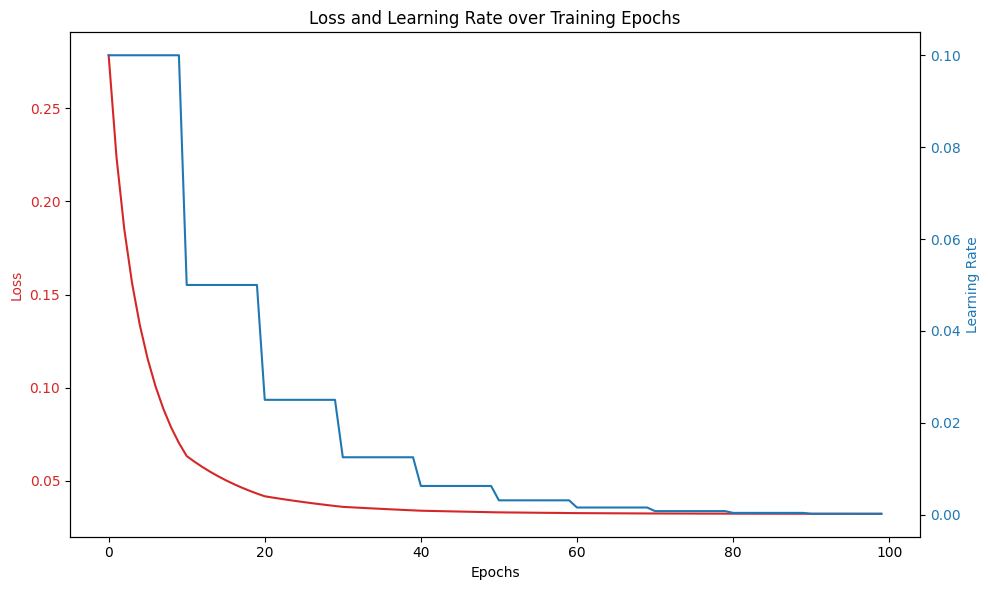

In [50]:
# Plot of Learning Rates and Loss

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(range(epochs), losses, color='tab:red', label='Loss')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Learning Rate', color='tab:blue')
ax2.plot(range(epochs), learning_rates, color='tab:blue', label='Learning Rate')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Loss and Learning Rate over Training Epochs')
fig.tight_layout()
plt.show()

2. We are using the Mean Squared Error loss function to evaluate the performance of our NN as it is measuring how far off the model's predictions are from the actual target values. A lower MSE indicates that the predictions are closer to the true values.

3. To train our NN, the training datasets were preprocessed and converted to tensors. We used stochastic gradient descent as our optimization algorithm with an initial learning rate of 0.1. The learning rate determines the size of weight updates and we used a learning rate scheduler with forward and backward pass to find the optimal learning rate. We trained for 100 epochs.

In [51]:
# After training
model.eval() 

with torch.no_grad(): 
    test_predictions = model(X_test_tensor)  # forward pass
    test_loss = loss_fn(test_predictions, y_test_tensor)  #test loss

predicted = test_predictions.numpy()
actual = y_test_tensor.numpy()

print(f'Test Loss: {test_loss.item():.4f}')

rmse = np.sqrt(np.mean((predicted - actual) ** 2))
print(f'Test RMSE: {rmse:.4f}')


Test Loss: 0.0325
Test RMSE: 0.1801
